# Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)


CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)


def covid19(name: str) -> pd.DataFrame:
    # Select matching country
    c = confirmed['Country/Region'] == name
    d = deaths['Country/Region'] == name
    r = recovered['Country/Region'] == name
    
    # Merge data and discard not needed columns
    df = pd.concat([
        confirmed.loc[c].transpose()[4:],
        deaths.loc[d].transpose()[4:],
        recovered.loc[r].transpose()[4:]
    ], axis=1, keys=['Confirmed', 'Deaths', 'Recovered'])
    
    # Set columns and index
    df.columns = df.columns.droplevel(1)
    df.index = pd.to_datetime(df.index)
    df.sort_index(ascending=True, inplace=True)

    # Create figure and axis objects
    fig, ax = plt.subplots(
        nrows=3,
        ncols=1,
        sharex=True,
        sharey=False,
        gridspec_kw={'height_ratios': [2, 1, 1]},
        figsize=(15, 5))

    # Set layout for 'Confirmed' cases
    ax[0].plot(df['Confirmed'], color='red')
    ax[0].set_ylim(ymin=0, ymax=None)
    ax[0].set_ylabel('Confirmed')
    ax[0].grid(True, which='major')

    # Set layout for 'Deaths' cases
    ax[1].plot(df['Deaths'], color='black')
    ax[1].set_ylim(ymin=0, ymax=None)
    ax[1].set_ylabel('Deaths')
    ax[1].grid(True, which='major')

    # Set layout for 'Recovered' cases
    ax[2].plot(df['Recovered'], color='green')
    ax[2].set_ylim(ymin=0, ymax=None)
    ax[2].set_ylabel('Recovered')
    ax[2].grid(True, which='major')

    # Set genera layout for whole figure
    fig.tight_layout()
    plt.setp(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()


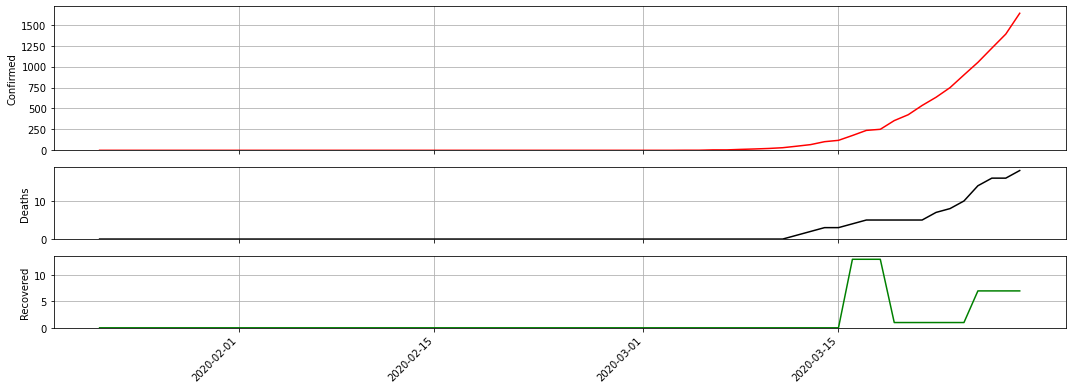

In [2]:
covid19('Poland')

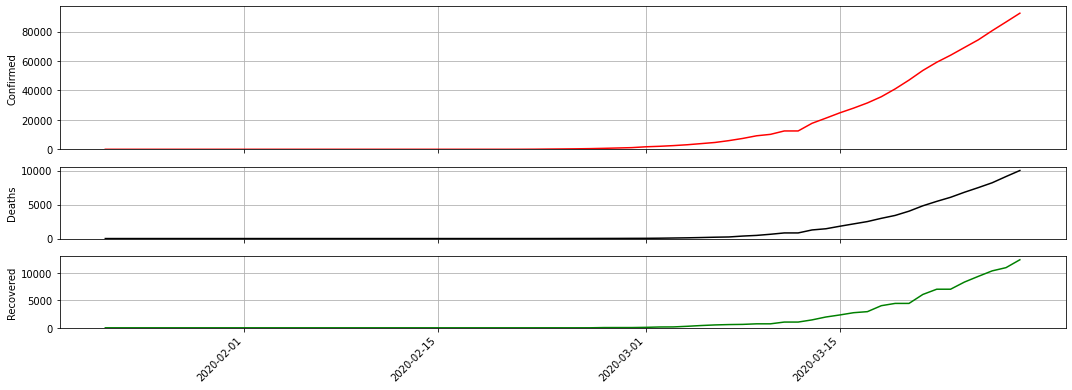

In [3]:
covid19('Italy')

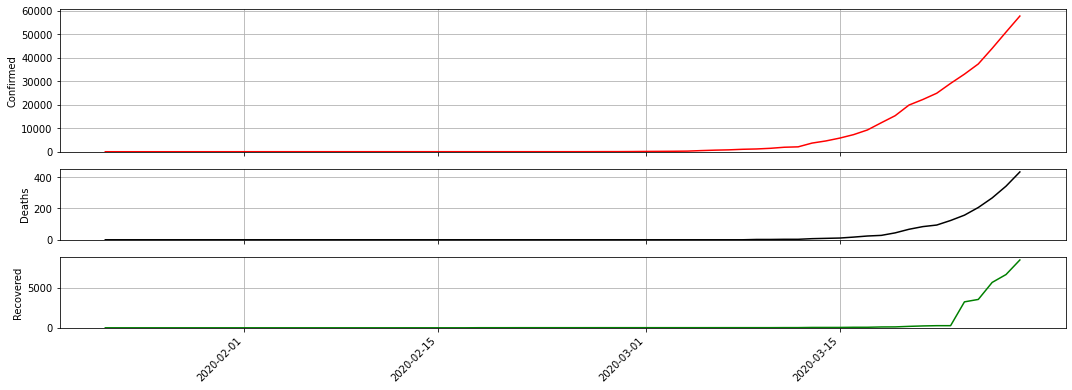

In [4]:
covid19('Germany')

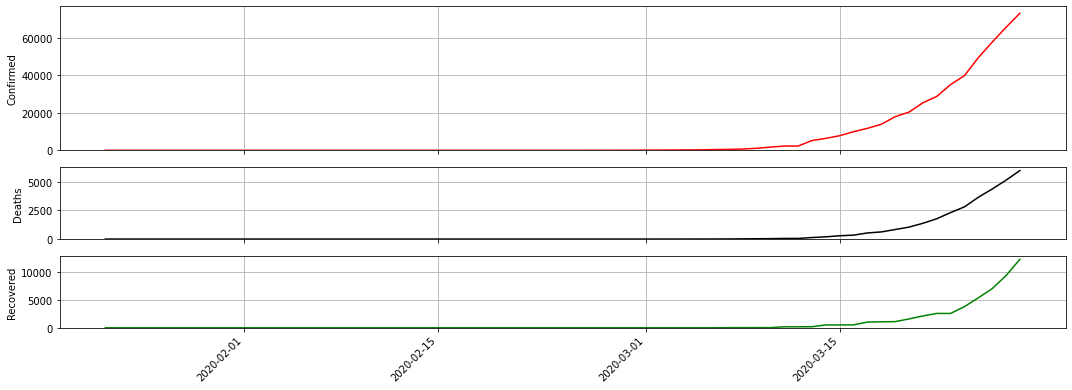

In [5]:
covid19('Spain')

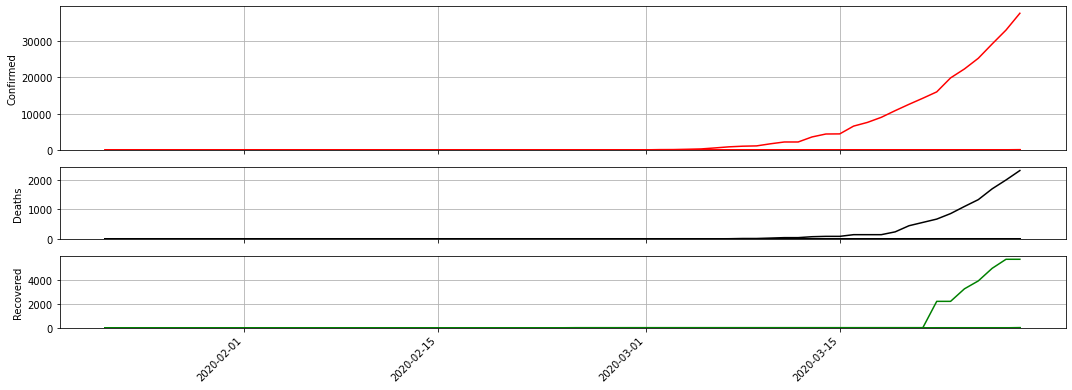

In [6]:
covid19('France')